# USING THE NEW YORK TIME API, WE WILL ANALYZE SENTIMENT OF THE LAST TWO MONTHS OF THE YEAR FROM 1992-2019 TO PREDICT SENTIMENT FOR 2020.

In [13]:
import os
import pandas as pd
from dotenv import load_dotenv
from nytimesarticle import articleAPI
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)
from pathlib import Path

import numpy as np
import hvplot.pandas

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

from sklearn.ensemble import RandomForestRegressor

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
load_dotenv()

True

In [14]:
#called api key
nyt_api_key = os.getenv("NYT_API")

api= articleAPI(nyt_api_key)

api

In [15]:
# pulled articles from NYT (90s)
articles_92 = api.search(q="holiday sales",begin_date=19921101, end_date=19921231)
articles_93 = api.search(q="holiday sales",begin_date=19931101, end_date=19931231)
articles_94 = api.search(q="holiday sales",begin_date=19941101, end_date=19941231)
articles_95 = api.search(q="holiday sales",begin_date=19951101, end_date=19951231)
articles_96 = api.search(q="holiday sales",begin_date=19961101, end_date=19961231)
articles_97 = api.search(q="holiday sales",begin_date=19971101, end_date=19971231)
articles_98 = api.search(q="holiday sales",begin_date=19981101, end_date=19981231)
articles_99 = api.search(q="holiday sales",begin_date=19991101, end_date=19991231)

In [16]:
# pulled articles from NYT(00s)
articles_00 = api.search(q="holiday sales",begin_date=20001101, end_date=20001231)
articles_01 = api.search(q="holiday sales",begin_date=20011101, end_date=20011231)
articles_02 = api.search(q="holiday sales",begin_date=20021101, end_date=20021231)
articles_03 = api.search(q="holiday sales",begin_date=20031101, end_date=20031231)
articles_04 = api.search(q="holiday sales",begin_date=20041101, end_date=20041231)
articles_05 = api.search(q="holiday sales",begin_date=20051101, end_date=20051231)
articles_06 = api.search(q="holiday sales",begin_date=20061101, end_date=20061231)
articles_07 = api.search(q="holiday sales",begin_date=20071101, end_date=20071231)
articles_08 = api.search(q="holiday sales",begin_date=20081101, end_date=20081231)
articles_09 = api.search(q="holiday sales",begin_date=20091101, end_date=20091231)


In [17]:
#pulled articles for NYT (00-19)
articles_10 = api.search(q="holiday sales",begin_date=20101101, end_date=20101231)
articles_11 = api.search(q="holiday sales",begin_date=20111101, end_date=20111231)
articles_12 = api.search(q="holiday sales",begin_date=20121101, end_date=20121231)
articles_13 = api.search(q="holiday sales",begin_date=20131101, end_date=20131231)
articles_14 = api.search(q="holiday sales",begin_date=20141101, end_date=20141231)
articles_15 = api.search(q="holiday sales",begin_date=20151101, end_date=20151231)
articles_16 = api.search(q="holiday sales",begin_date=20161101, end_date=20161231)
articles_17 = api.search(q="holiday sales",begin_date=20171101, end_date=20171231)
articles_18 = api.search(q="holiday sales",begin_date=20181101, end_date=20181231)
articles_19 = api.search(q="holiday sales",begin_date=20191101, end_date=20191231)


In [18]:
articles_92


{'status': 'OK',
 'copyright': 'Copyright (c) 2020 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [], 'meta': {'hits': 0, 'offset': 0, 'time': 15}}}

In [19]:
# Dataframe for 92
articles92= articles_92['response']
articles_df_92 = pd.DataFrame(articles92['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])

articles_df_92.head()

KeyError: 'pub_date'

In [20]:
# Dataframe for 93
articles93= articles_93['response']
articles_df_93 = pd.DataFrame(articles93['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_93.head()

KeyError: 'pub_date'

In [ ]:
# Dataframe for 94
articles94= articles_94['response']
articles_df_94 = pd.DataFrame(articles94['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_94.head()

In [ ]:
# Dataframe for 95
articles95= articles_95['response']
articles_df_95 = pd.DataFrame(articles95['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_95.head()

In [ ]:
# Dataframe for 96
articles96= articles_96['response']
articles_df_96 = pd.DataFrame(articles96['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_96.head()

In [ ]:
# Dataframe for 97
articles97= articles_97['response']
articles_df_97 = pd.DataFrame(articles97['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_97.head()

In [ ]:
# Dataframe for 98
articles98= articles_98['response']
articles_df_98 = pd.DataFrame(articles98['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_98.head()

In [ ]:
# Dataframe for 99
articles99= articles_99['response']
articles_df_99 = pd.DataFrame(articles99['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_99.head()

In [ ]:
# Dataframe for 00
articles00= articles_00['response']
articles_df_00 = pd.DataFrame(articles00['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_00.head()

In [ ]:
# Dataframe for 01
articles01= articles_01['response']
articles_df_01 = pd.DataFrame(articles01['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_01.head()

In [ ]:
# Dataframe for 02
articles02= articles_02['response']
articles_df_02 = pd.DataFrame(articles02['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_02.head()

In [ ]:
# Dataframe for 03
articles03= articles_03['response']
articles_df_03 = pd.DataFrame(articles03['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_03.head()

In [ ]:
# Dataframe for 04
articles04= articles_04['response']
articles_df_04 = pd.DataFrame(articles04['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_04.head()

In [ ]:
# Dataframe for 05
articles05= articles_05['response']
articles_df_05 = pd.DataFrame(articles05['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_05.head()

In [ ]:
# Dataframe for 06
articles06= articles_06['response']
articles_df_06 = pd.DataFrame(articles06['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_06.head()

In [ ]:
# Dataframe for 07
articles07= articles_07['response']
articles_df_07 = pd.DataFrame(articles07['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_07.head()

In [ ]:
# Dataframe for 08
articles08= articles_08['response']
articles_df_08 = pd.DataFrame(articles08['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_08.head()

In [ ]:
# Dataframe for 09
articles09= articles_09['response']
articles_df_09 = pd.DataFrame(articles09['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_09.head()

In [ ]:
# Dataframe for 10
articles10= articles_10['response']
articles_df_10 = pd.DataFrame(articles10['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_10.head()

In [ ]:
# Dataframe for 11
articles11= articles_11['response']
articles_df_11 = pd.DataFrame(articles11['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_11.head()

In [ ]:
# Dataframe for 12
articles12= articles_12['response']
articles_df_12 = pd.DataFrame(articles12['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_12.head()

In [ ]:
# Dataframe for 13
articles13= articles_13['response']
articles_df_13 = pd.DataFrame(articles13['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_13.head()

In [ ]:
# Dataframe for 14
articles14= articles_14['response']
articles_df_14 = pd.DataFrame(articles14['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_14.head()

In [ ]:
# Dataframe for 15
articles15= articles_15['response']
articles_df_15 = pd.DataFrame(articles15['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_15.head()

In [ ]:
# Dataframe for 16
articles16= articles_16['response']
articles_df_16 = pd.DataFrame(articles16['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_16.head()

In [ ]:
# Dataframe for 17
articles17= articles_17['response']
articles_df_17 = pd.DataFrame(articles17['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_17.head()

In [ ]:
# Dataframe for 18
articles18= articles_18['response']
articles_df_18 = pd.DataFrame(articles18['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_18.head()

In [ ]:
# Dataframe for 19
articles19= articles_19['response']
articles_df_19 = pd.DataFrame(articles19['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_19.head()

In [ ]:
#concat all dataframes into one

NYT_articles= pd.concat([articles_df_92,articles_df_93,articles_df_94, articles_df_95, articles_df_96,articles_df_97,articles_df_98,articles_df_99,articles_df_00
                        ,articles_df_01,articles_df_02, articles_df_03, articles_df_04, articles_df_05
                        ,articles_df_06, articles_df_07, articles_df_08, articles_df_09
                        , articles_df_10,articles_df_11, articles_df_12, articles_df_13,articles_df_14,articles_df_15
                        ,articles_df_16, articles_df_17, articles_df_18,articles_df_19])
NYT_articles.head()

In [ ]:
# clean up data

NYT_articles.isnull().sum()


In [ ]:
# create a dataframe with just the abstract.

NYT_abstract= NYT_articles.drop(columns=['headline','keywords','lead_paragraph'])
NYT_abstract.head()

In [ ]:
NYT_abstract.reset_index().head()

In [ ]:
# function to get sentiment from dataframe NYT_abstract

def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [ ]:
# created sentiment scores for "abstract" and a new dataframe with scores.

nltk_results=[nltk_sentiment(abstract) for abstract in NYT_abstract["abstract"]]
results_df = pd.DataFrame(nltk_results)

nltk_df = results_df.join(NYT_abstract.reset_index())
nltk_df= nltk_df[['pub_date', 'abstract','compound', 'neg', 'neu', 'pos']]
nltk_df.head()

In [ ]:
nltk_df.to_csv("NYT_nlk_updated")

In [ ]:
nltk_df.describe()

In [ ]:
nltk_df.to_csv("NYT_updated.csv")

In [21]:
# loading full data

file_path=Path("NEW_Nov_Dec_NLTK_Average_Sentiment_Score_2.csv")
NYTIMES_df=pd.read_csv(file_path,infer_datetime_format=True,parse_dates=True)
NYTIMES_df=NYTIMES_df.set_index('DATE').sort_values('DATE',ascending=True)
NYTIMES_df.head()

,compound
DATE,
11/1/1992,0.812100
11/1/1993,0.762175
11/1/1994,0.667100
11/1/1995,0.485533
11/1/1996,0.722600


In [22]:
file_path=Path("nov_dec_featuress.csv")
Nov_dec_df=pd.read_csv(file_path,infer_datetime_format=True,parse_dates=True)
Nov_dec_df=Nov_dec_df.set_index('DATE').sort_values('DATE',ascending=True)
Nov_dec_df.head()

,y_monthly_retail,gas_prices,consumer_sentiments,unemployment_rate,CPI,dow_index,Consumer_debt_service,Pct_chng_prv_yr,GDPC1
DATE,,,,,,,,,
11/1/1992,153583.0,1.11120,85.3,7.4,142.1,91.12,4.660212,4.4,9834.510
11/1/1993,166594.0,1.06640,81.2,6.6,146.0,96.43,4.755414,2.6,10091.049
11/1/1994,180703.0,1.11575,91.6,5.6,149.8,89.19,5.120072,4.1,10506.372
11/1/1995,189055.0,1.06225,88.2,5.6,153.7,85.37,5.594352,2.2,10737.478
11/1/1996,200174.0,1.23225,99.2,5.4,158.7,87.88,5.777011,4.4,11212.205


In [23]:
Main_df= NYTIMES_df.join( Nov_dec_df,sort=False)
Main_df.head()

,compound,y_monthly_retail,gas_prices,consumer_sentiments,unemployment_rate,CPI,dow_index,Consumer_debt_service,Pct_chng_prv_yr,GDPC1
DATE,,,,,,,,,,
11/1/1992,0.812100,153583.0,1.11120,85.3,7.4,142.1,91.12,4.660212,4.4,9834.510
11/1/1993,0.762175,166594.0,1.06640,81.2,6.6,146.0,96.43,4.755414,2.6,10091.049
11/1/1994,0.667100,180703.0,1.11575,91.6,5.6,149.8,89.19,5.120072,4.1,10506.372
11/1/1995,0.485533,189055.0,1.06225,88.2,5.6,153.7,85.37,5.594352,2.2,10737.478
11/1/1996,0.722600,200174.0,1.23225,99.2,5.4,158.7,87.88,5.777011,4.4,11212.205


In [24]:
#Hodrick-Prescott filter on columns "y_monthly_retail" , "CPI", 'GDP_growth', 'GDPC1'
import statsmodels.api as sm
ts_noise1, ts_trend1 = sm.tsa.filters.hpfilter(Main_df['y_monthly_retail'])
ts_noise2, ts_trend2 = sm.tsa.filters.hpfilter(Main_df['CPI'])
ts_noise4, ts_trend4 = sm.tsa.filters.hpfilter(Main_df['GDPC1'])

In [25]:
Main_df['Sales']= ts_noise1
Main_df['CPI']= ts_noise2
Main_df['GDP']= ts_noise4
Main_df= Main_df.drop(columns={'y_monthly_retail','GDPC1'})
Main_df= Main_df.rename(columns={'Pct_chng_prv_yr':'GDP_growth', 'Sales':'sales', 'compound':'NYT_sentiment', 'dow_index':'retail_index'})
Main_df.tail()

,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,retail_index,Consumer_debt_service,GDP_growth,sales,GDP
DATE,,,,,,,,,,
12/1/2015,-0.421500,2.03750,92.6,5.0,2.003644,98.745,5.399252,2.2,8444.025888,257.481420
12/1/2016,0.302650,2.25425,98.2,4.7,2.737403,102.286,5.591750,2.1,13296.818400,305.310794
12/1/2017,0.000000,2.47675,95.9,4.1,3.636880,91.826,5.576678,2.7,23557.309410,471.852246
12/1/2018,0.346600,2.36560,98.3,3.9,4.197560,95.735,5.520130,2.5,14725.149369,608.339093
12/1/2019,0.222725,2.55500,99.3,3.5,5.739651,96.058,5.614131,2.3,28358.265413,729.914743


In [26]:
Main_df.to_csv("Main_df.csv")

In [97]:
file_path=Path("MAIN_DF_WITH_GOLD.csv")
MAIN_df=pd.read_csv(file_path,infer_datetime_format=True,parse_dates=True)
MAIN_df=MAIN_df.set_index('DATE').sort_values('DATE',ascending=True).drop(columns={'Unnamed: 0'})
MAIN_df.head()

,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,Retail_Index_Returns,Consumer_debt_service,GDP_growth,sales,GDP,Gold_Returns
DATE,,,,,,,,,,,
11/1/1992,0.812100,1.11120,85.3,7.4,-3.664766,0.000000,4.660212,4.4,-18182.99304,-576.109447,0.000000
11/1/1993,0.762175,1.06640,81.2,6.6,-4.077295,0.058275,4.755414,2.6,-15860.78098,-676.804025,0.069956
11/1/1994,0.667100,1.11575,91.6,5.6,-4.587534,-0.075080,5.120072,4.1,-12429.20455,-618.354534,0.058500
11/1/1995,0.485533,1.06225,88.2,5.6,-4.990644,-0.042830,5.594352,2.2,-14721.98639,-742.978904,-0.006632
11/1/1996,0.722600,1.23225,99.2,5.4,-4.278919,0.029401,5.777011,4.4,-14186.08089,-621.669592,-0.011389


## DECISION TREE

In [85]:
# Define features set
X = MAIN_df.copy()
X.drop({"sales"}, axis=1, inplace=True)

X.head()


,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,Retail_Index_Returns,Consumer_debt_service,GDP_growth,GDP,Gold_Returns
DATE,,,,,,,,,,
11/1/1992,0.812100,1.11120,85.3,7.4,-3.664766,0.000000,4.660212,4.4,-576.109447,0.000000
11/1/1993,0.762175,1.06640,81.2,6.6,-4.077295,0.058275,4.755414,2.6,-676.804025,0.069956
11/1/1994,0.667100,1.11575,91.6,5.6,-4.587534,-0.075080,5.120072,4.1,-618.354534,0.058500
11/1/1995,0.485533,1.06225,88.2,5.6,-4.990644,-0.042830,5.594352,2.2,-742.978904,-0.006632
11/1/1996,0.722600,1.23225,99.2,5.4,-4.278919,0.029401,5.777011,4.4,-621.669592,-0.011389


In [86]:
# Define target vector
y = MAIN_df["sales"].values.reshape(-1, 1)
y[:5]


array([[-18182.99304],
       [-15860.78098],
       [-12429.20455],
       [-14721.98639],
       [-14186.08089]])

In [87]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [88]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeRegressor()
# Fitting the model
DecisionRegressor = model.fit(X_train, y_train)




In [89]:
# Making predictions using the testing data
predictions = DecisionRegressor.predict(X_test)



In [90]:
Predictions_tree=pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)
Predictions_tree.head()

,Prediction,Actual
0,-27909.14982,-24116.553180
1,14695.30502,13296.818400
2,47667.32448,87065.740710
3,-14721.98639,10382.970910
4,23554.14551,4820.265943


<AxesSubplot:>

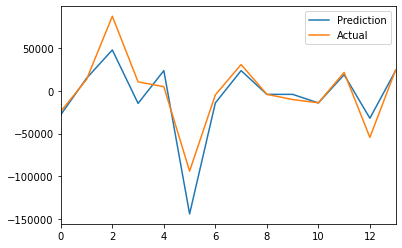

In [91]:
Predictions_tree.plot()

In [92]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test, predictions)


0.745755446603428

In [93]:
mse = mean_squared_error(y_test, predictions)
mse

409789556.65769035

In [94]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

20243.259536391128

## NEW DF FOR PREDICTIVE MODEL

In [188]:
Main_2= MAIN_df.copy()
Main_2['shifted_sales']= Main_2.sales.shift()
Main_2=Main_2.dropna()
Main_2=Main_2.reset_index()
Main_2.head()

,DATE,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,Retail_Index_Returns,Consumer_debt_service,GDP_growth,sales,GDP,Gold_Returns,shifted_sales
0,11/1/1993,0.762175,1.06640,81.2,6.6,-4.077295,0.058275,4.755414,2.6,-15860.78098,-676.804025,0.069956,-18182.99304
1,11/1/1994,0.667100,1.11575,91.6,5.6,-4.587534,-0.075080,5.120072,4.1,-12429.20455,-618.354534,0.058500,-15860.78098
2,11/1/1995,0.485533,1.06225,88.2,5.6,-4.990644,-0.042830,5.594352,2.2,-14721.98639,-742.978904,-0.006632,-12429.20455
3,11/1/1996,0.722600,1.23225,99.2,5.4,-4.278919,0.029401,5.777011,4.4,-14186.08089,-621.669592,-0.011389,-14721.98639
4,11/1/1997,0.855950,1.17075,107.2,4.6,-5.541533,0.112995,5.705666,4.5,-15907.24120,-467.952693,-0.168962,-14186.08089


In [189]:
Main_2['DATE'] =pd.to_datetime(Main_2.DATE)
Main_2= Main_2.set_index("DATE")

Main_2.head()

,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,Retail_Index_Returns,Consumer_debt_service,GDP_growth,sales,GDP,Gold_Returns,shifted_sales
DATE,,,,,,,,,,,,
1993-11-01,0.762175,1.06640,81.2,6.6,-4.077295,0.058275,4.755414,2.6,-15860.78098,-676.804025,0.069956,-18182.99304
1994-11-01,0.667100,1.11575,91.6,5.6,-4.587534,-0.075080,5.120072,4.1,-12429.20455,-618.354534,0.058500,-15860.78098
1995-11-01,0.485533,1.06225,88.2,5.6,-4.990644,-0.042830,5.594352,2.2,-14721.98639,-742.978904,-0.006632,-12429.20455
1996-11-01,0.722600,1.23225,99.2,5.4,-4.278919,0.029401,5.777011,4.4,-14186.08089,-621.669592,-0.011389,-14721.98639
1997-11-01,0.855950,1.17075,107.2,4.6,-5.541533,0.112995,5.705666,4.5,-15907.24120,-467.952693,-0.168962,-14186.08089


In [191]:
Main_2= Main_2.sort_index()
Main_2.head()

,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,Retail_Index_Returns,Consumer_debt_service,GDP_growth,sales,GDP,Gold_Returns,shifted_sales
DATE,,,,,,,,,,,,
1992-12-01,0.458857,1.07750,91.0,7.4,-55.865683,-0.044113,4.660212,4.4,-143836.96580,-4628.850176,-0.770981,155602.46170
1993-11-01,0.762175,1.06640,81.2,6.6,-4.077295,0.058275,4.755414,2.6,-15860.78098,-676.804025,0.069956,-18182.99304
1993-12-01,0.500550,1.01400,88.2,6.5,-49.461028,0.038244,4.755414,2.6,-125760.23380,-4202.521831,0.114896,-143836.96580
1994-11-01,0.667100,1.11575,91.6,5.6,-4.587534,-0.075080,5.120072,4.1,-12429.20455,-618.354534,0.058500,-15860.78098
1994-12-01,0.366667,1.09050,95.1,5.5,-43.478215,-0.089986,5.120072,4.1,-107366.16520,-3636.164463,0.018762,-125760.23380


# DECISION TREE MODEL PREDICTIVE MODEL (SHIFTED Y)

In [192]:
# Define features set
X = Main_2.copy()
X.drop({"sales",'shifted_sales','Retail_Index_Returns', 'consumer_sentiments', 'gas_prices'}, axis=1, inplace=True)

X.head()


,NYT_sentiment,unemployment_rate,CPI,Consumer_debt_service,GDP_growth,GDP,Gold_Returns
DATE,,,,,,,
1992-12-01,0.458857,7.4,-55.865683,4.660212,4.4,-4628.850176,-0.770981
1993-11-01,0.762175,6.6,-4.077295,4.755414,2.6,-676.804025,0.069956
1993-12-01,0.500550,6.5,-49.461028,4.755414,2.6,-4202.521831,0.114896
1994-11-01,0.667100,5.6,-4.587534,5.120072,4.1,-618.354534,0.058500
1994-12-01,0.366667,5.5,-43.478215,5.120072,4.1,-3636.164463,0.018762


In [193]:
# Define target vector
y = Main_2["shifted_sales"].values.reshape(-1, 1)
y[:5]


array([[ 155602.4617 ],
       [ -18182.99304],
       [-143836.9658 ],
       [ -15860.78098],
       [-125760.2338 ]])

In [194]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [195]:
X_test.shape

(14, 7)

In [196]:
X_train.shape

(41, 7)

In [197]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeRegressor()
# Fitting the model
DecisionRegressor = model.fit(X_train, y_train)




In [198]:
# Making predictions using the testing data
predictions = DecisionRegressor.predict(X_test)



In [199]:
Predictions_tree=pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)
Predictions_tree.head()

,Prediction,Actual
0,-12957.246610,4820.265943
1,21482.947170,24356.842720
2,-4139.194174,-10306.371500
3,116289.428200,87065.740710
4,-4842.438969,-27909.149820


<AxesSubplot:>

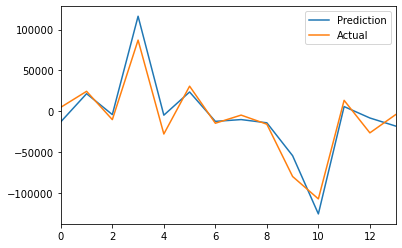

In [200]:
Predictions_tree.plot()

In [201]:
predictions

array([ -12957.24661 ,   21482.94717 ,   -4139.194174,  116289.4282  ,
         -4842.438969,   23554.14551 ,  -12429.20455 ,  -10241.50053 ,
        -14186.08089 ,  -54482.40899 , -125760.2338  ,    5678.009712,
         -8292.319532,  -18182.99304 ])

In [202]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test, predictions)


0.8786481710499019

In [203]:
mse = mean_squared_error(y_test, predictions)
mse

243538750.19026047

In [204]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

15605.728121118234

# RANDOM FOREST MODEL

In [205]:
# Define features set
X = Main_df.copy()
X.drop({"sales"}, axis=1, inplace=True)
X.head()

# Define target vector
y = Main_df["sales"].values.reshape(-1, 1)
y[:5]



array([[-18182.99304049],
       [-15860.78098196],
       [-12429.20455277],
       [-14721.98639417],
       [-14186.08089454]])

In [206]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


## Fitting the Random Forest Model

In [207]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
# Making predictions using the testing data
predictions = rf_model.predict(X_test)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


<AxesSubplot:>

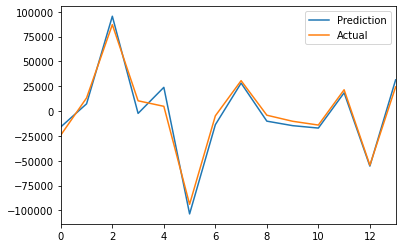

In [208]:

Predictions_forest=pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)
Predictions_forest.plot()

## EVALUATING RANDOM FOREST

In [209]:
r2_score(y_test, predictions)


0.9554075279949993

In [210]:
mse = mean_squared_error(y_test, predictions)
mse

71873828.12550409

In [211]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

8477.843365237653

## RANDOM FOREST PREDICTIVE MODEL

In [212]:
# Define features set
X = Main_2.copy()
X.drop({"sales",'shifted_sales','Retail_Index_Returns', 'consumer_sentiments', 'gas_prices'}, axis=1, inplace=True)

X.head()


,NYT_sentiment,unemployment_rate,CPI,Consumer_debt_service,GDP_growth,GDP,Gold_Returns
DATE,,,,,,,
1992-12-01,0.458857,7.4,-55.865683,4.660212,4.4,-4628.850176,-0.770981
1993-11-01,0.762175,6.6,-4.077295,4.755414,2.6,-676.804025,0.069956
1993-12-01,0.500550,6.5,-49.461028,4.755414,2.6,-4202.521831,0.114896
1994-11-01,0.667100,5.6,-4.587534,5.120072,4.1,-618.354534,0.058500
1994-12-01,0.366667,5.5,-43.478215,5.120072,4.1,-3636.164463,0.018762


In [213]:
# Define target vector
y = Main_2["shifted_sales"].values.reshape(-1, 1)
y[:5]


array([[ 155602.4617 ],
       [ -18182.99304],
       [-143836.9658 ],
       [ -15860.78098],
       [-125760.2338 ]])

In [214]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [215]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
# Making predictions using the testing data
predictions_1 = rf_model.predict(X_test)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


<AxesSubplot:>

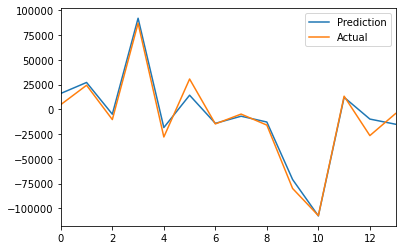

In [216]:

Predictions_forest=pd.DataFrame({"Prediction": predictions_1, "Actual": y_test.ravel()}).head(20)
Predictions_forest.plot()

In [217]:
r2_score(y_test, predictions_1)


0.9628939513351432

In [218]:
mse = mean_squared_error(y_test, predictions_1)
mse

74467445.56321658

In [219]:
mse= mean_squared_error(y_test, predictions_1)
rmse= np.sqrt(mse)
rmse

8629.452216868494

In [230]:
X_P= Main_2.tail(2)
X_P

,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,Retail_Index_Returns,Consumer_debt_service,GDP_growth,sales,GDP,Gold_Returns,shifted_sales
DATE,,,,,,,,,,,,
2019-11-01,0.000000,2.59775,96.8,3.5,57.165400,0.010350,5.614131,2.3,155602.46170,4612.023799,0.186882,136264.76990
2019-12-01,0.222725,2.55500,99.3,3.5,5.739651,0.003374,5.614131,2.3,28358.26541,729.914743,0.266333,14725.14937


In [232]:
predictions_end = rf_model.predict(X)
predictions_end

array([  54944.84552452,  -13916.33571303, -101407.76352706,
        -16159.75164795, -110716.65222824,  -14233.10371317,
       -107675.28276355,  -14146.86076554,  -88727.10719252,
        -13632.41496685,  -70901.57016347,  -12791.34639226,
        -63163.4103279 ,  -12224.37430836,  -50377.78350674,
         -6923.25764525,  -27951.00081986,   -7770.50772708,
        -18371.32886851,  -15043.74023048,  -20461.93277406,
         -9335.21603985,  -15698.94515781,   -2192.97378871,
         -4892.1908865 ,    6784.17906909,    6430.35648868,
         15202.80732776,   14733.481425  ,   17646.5483508 ,
         19196.96155336,   14300.40391301,   14364.09584834,
         -7839.58235775,   -9811.54095412,   -6314.09806866,
        -14608.66272231,   16103.1190931 ,   -7718.59528539,
         27173.88432872,   -1585.78428583,   37094.04444547,
          3584.70421286,   53571.73278819,    8070.81945819,
         62077.37030336,   11035.51983019,   71468.99014946,
          8789.13548437,

In [235]:
Predictions_f=pd.DataFrame({"Prediction": predictions_end, "Actual": y.ravel()})
Predictions_f

,Prediction,Actual
0,54944.845525,155602.461700
1,-13916.335713,-18182.993040
2,-101407.763527,-143836.965800
3,-16159.751648,-15860.780980
4,-110716.652228,-125760.233800
5,-14233.103713,-12429.204550
6,-107675.282764,-107366.165200
7,-14146.860766,-14721.986390
8,-88727.107193,-93826.982850
9,-13632.414967,-14186.080890


In [237]:
Main_2.shape

(55, 12)

## GRADIENT BOOST MODEL

In [137]:
# Define features set
X = MAIN_df.copy()
X.drop({"sales"}, axis=1, inplace=True)
X.head()

# Define target vector
y = MAIN_df["sales"].values.reshape(-1, 1)
y[:5]



array([[-18182.99304],
       [-15860.78098],
       [-12429.20455],
       [-14721.98639],
       [-14186.08089]])

In [138]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=78)



In [140]:
# Create a regression object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    regressor = GradientBoostingRegressor(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
# Fit the model
regressor.fit(X_train, y_train.ravel())
    
# Make Prediction
predictions = regressor.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

,Prediction,Actual
0,-9682.831053,-24116.553180
1,9448.612192,13296.818400
2,78034.484778,87065.740710
3,5503.467099,10382.970910
4,-17318.629922,4820.265943
5,-50741.570408,-93826.982850
6,-23015.430577,-4767.364590
7,23470.089879,30654.609980
8,-11030.680757,-4139.194174
9,-12044.958789,-10241.500530


In [ ]:
# Choose a learning rate and create regression
classifier = GradientBoostingRegressor(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train, y_train.ravel())

# Make Prediction
predictions = classifier.predict(X_test)
predict=pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)
predict.plot()

## EVALUATING THE MODEL

In [141]:
r2_score(y_test, predictions)


0.7951030399567943

In [142]:
mse = mean_squared_error(y_test, predictions)
mse

330251457.8774289

In [143]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

18172.82195690666

## GRADIENT BOOST PREDICTIVE

In [144]:
# Define features set
X = Main_2.copy()
X.drop({"sales",'shifted_sales','Retail_Index_Returns', 'consumer_sentiments', 'gas_prices'}, axis=1, inplace=True)

X.head()


,NYT_sentiment,unemployment_rate,CPI,Consumer_debt_service,GDP_growth,GDP,Gold_Returns
DATE,,,,,,,
11/1/1993,0.762175,6.6,-4.077295,4.755414,2.6,-676.804025,0.069956
11/1/1994,0.667100,5.6,-4.587534,5.120072,4.1,-618.354534,0.058500
11/1/1995,0.485533,5.6,-4.990644,5.594352,2.2,-742.978904,-0.006632
11/1/1996,0.722600,5.4,-4.278919,5.777011,4.4,-621.669592,-0.011389
11/1/1997,0.855950,4.6,-5.541533,5.705666,4.5,-467.952693,-0.168962


In [145]:
# Define target vector
y = Main_2["shifted_sales"].values.reshape(-1, 1)
y[:5]


array([[-18182.99304],
       [-15860.78098],
       [-12429.20455],
       [-14721.98639],
       [-14186.08089]])

In [146]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=78)



In [147]:
# Create a regression object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    regressor = GradientBoostingRegressor(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
# Fit the model
regressor.fit(X_train, y_train.ravel())
    
# Make Prediction
predictions = regressor.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

,Prediction,Actual
0,-3671.929670,-24116.553180
1,9386.449853,-10306.371500
2,69954.907480,87065.740710
3,6930.361035,8986.414982
4,-9237.287671,4820.265943
5,-119454.222917,-93826.982850
6,5708.302902,-4767.364590
7,22488.905814,30654.609980
8,10303.897186,-4139.194174
9,15381.116935,-10241.500530


In [148]:
r2_score(y_test, predictions)


0.5995808818136175

In [149]:
mse = mean_squared_error(y_test, predictions)
mse

627821243.6266602

In [150]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

25056.361340519103

In [1]:
# Need the df with the dates in the right order below.

# **LSTM/ Gold vs. Retail Relationship Work**

In [54]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.tsa
import statsmodels.tsa.stattools as ts 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [8]:
# DataFrame of Monthly Gold Prices 1992-2020.
file_path=Path("~/git/HolidaySales/DataSets/1992_To_2020_Monthly_Gold_clean.csv")
full_gold_df=pd.read_csv(file_path,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [9]:
full_gold_df.head()

,close
DATE,
1992-01-01,350.90
1992-02-01,356.40
1992-03-01,350.45
1992-04-01,344.00
1992-05-01,337.50


In [10]:
# DataFrame of ALL features not including NLP sentiment from 1992 to 2020 Monthly.
file_path2=Path("~/git/HolidaySales/DataSets/features.csv")
features_df=pd.read_csv(file_path2,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [11]:
features_df.head()

,y_monthly_retail,gas_prices,consumer_sentiments,unemployment_rate,CPI,dow_index,Consumer_debt_service,Pct_chng_prv_yr,GDPC1
DATE,,,,,,,,,
1992-01-01,146925.0,1.02200,67.5,7.3,138.3,88.41,4.867179,2.9,9534.346
1992-02-01,147223.0,1.00600,68.8,7.4,138.6,89.32,4.867179,2.9,9534.346
1992-03-01,146805.0,1.01260,76.0,7.4,139.1,90.88,4.867179,2.9,9534.346
1992-04-01,148032.0,1.05175,77.2,7.4,139.4,90.33,4.774439,3.2,9637.732
1992-05-01,149010.0,1.10725,79.2,7.6,139.7,87.50,4.774439,3.2,9637.732


In [12]:
# DataFrame of ALL features not including NLP sentiment from 1992 to 2020 Nov.-Dec. only.
file_path3=Path("~/git/HolidaySales/nov_dec_featuress.csv")
features_cut_df=pd.read_csv(file_path3,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [13]:
features_cut_df.head()

,y_monthly_retail,gas_prices,consumer_sentiments,unemployment_rate,CPI,dow_index,Consumer_debt_service,Pct_chng_prv_yr,GDPC1
DATE,,,,,,,,,
1992-11-01,153583.0,1.11120,85.3,7.4,142.1,91.12,4.660212,4.4,9834.510
1992-12-01,155614.0,1.07750,91.0,7.4,142.3,93.87,4.660212,4.4,9834.510
1993-11-01,166594.0,1.06640,81.2,6.6,146.0,96.43,4.755414,2.6,10091.049
1993-12-01,168161.0,1.01400,88.2,6.5,146.3,97.46,4.755414,2.6,10091.049
1994-11-01,180703.0,1.11575,91.6,5.6,149.8,89.19,5.120072,4.1,10506.372


In [14]:
# DataFrame of Nov-Dec NLTK Sentiment Scores.
file_path4=Path("~/git/HolidaySales/NYT_updated.csv")
nltk_df=pd.read_csv(file_path4,infer_datetime_format=True,parse_dates=True,index_col="pub_date")

In [15]:
# Organize and clean nltk data.
nltk_df=nltk_df.drop(columns=["Unnamed: 0"])
nltk_df.head()

,abstract,compound,neg,neu,pos
pub_date,,,,,
1992-12-26 05:00:00,It was a hair-raising holiday season for man...,0.7850,0.058,0.765,0.177
1992-12-13 05:00:00,A Blow to the Wallet Retailers and public ...,-0.1280,0.109,0.806,0.085
1992-11-28 05:00:00,Signs of a comeback in consumer spending pus...,0.6124,0.000,0.894,0.106
1992-12-12 05:00:00,Losses at R. H. Macy & Company narrowed in t...,-0.8316,0.115,0.867,0.018
1992-11-19 05:00:00,With their fingers tightly crossed and rabbi...,0.9797,0.110,0.542,0.348


In [16]:
nltk_df=nltk_df.sort_index()

In [17]:
nltk_df.head()

,abstract,compound,neg,neu,pos
pub_date,,,,,
1992-11-17 05:00:00,"The Kmart Corporation, the discount and spec...",0.8442,0.000,0.892,0.108
1992-11-19 05:00:00,With their fingers tightly crossed and rabbi...,0.9797,0.110,0.542,0.348
1992-11-28 05:00:00,Signs of a comeback in consumer spending pus...,0.6124,0.000,0.894,0.106
1992-12-10 05:00:00,The economy is improving modestly but uneven...,0.7227,0.054,0.812,0.134
1992-12-12 05:00:00,Losses at R. H. Macy & Company narrowed in t...,-0.8316,0.115,0.867,0.018


In [18]:
nltk_df=nltk_df.drop(columns=["abstract"])

In [19]:
nltk_df=nltk_df.drop(columns=["neg","neu","pos"])

In [20]:
nltk_df.index.year

Int64Index([1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992,
            ...
            2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='pub_date', length=262)

In [21]:
# Average the compound sentiment score for each month.
nltk_df_grp=nltk_df.groupby([nltk_df.index.year,nltk_df.index.month]).mean()

In [22]:
nltk_df_grp

compound
pub_date pub_date          
1992     11        0.812100
         12        0.458857
1993     11        0.762175
         12        0.500550
1994     11        0.667100
         12        0.366667
1995     11        0.485533
         12       -0.133071
1996     11        0.722600
         12        0.378529
1997     11        0.855950
         12        0.362400
1998     11        0.348533
         12        0.684171
1999     11        0.373900
         12        0.393729
2000     11        0.327100
         12        0.187512
2001     11       -0.161250
         12       -0.107625
2002     11        0.585900
         12        0.138056
2003     11        0.578900
         12        0.400457
2004     11        0.057950
         12        0.585150
2005     11        0.408386
         12        0.909933
2006     11        0.041875
         12        0.155633
2007     11        0.085457
         12        0.151167
2008     11        0.419380
         12        0.275620
2009     11        0.297650
         12        0.523625
2010     11        0.378350
         12        0.144425
2011     11        0.000000
         12        0.142437
2012     11        0.149275
         12        0.382017
2013     11        0.458200
         12       -0.298725
2014     11        0.115883
         12        0.245875
2015     11        0.388111
         12       -0.421500
2016     12        0.302650
2017     11        0.499420
         12        0.000000
2018     11        0.327625
         12        0.346600
2019     11        0.000000
         12        0.222725

In [23]:
nltk_df_grp.index

MultiIndex(levels=[[1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [11, 12]],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 25, 25, 26, 26, 27, 27], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]],
           names=['pub_date', 'pub_date'])

In [24]:
nltk_df_grp.index=nltk_df_grp.index.to_flat_index()

In [25]:
nltk_df_grp.head()

,compound
"(1992, 11)",0.812100
"(1992, 12)",0.458857
"(1993, 11)",0.762175
"(1993, 12)",0.500550
"(1994, 11)",0.667100


In [26]:
#nltk_df_grp.to_csv("NEW_Nov_Dec_NLTK_Average_Sentiment_Score_Annual.csv")

In [27]:
file_path5=Path("~/git/HolidaySales/NEW_Nov_Dec_NLTK_Average_Sentiment_Score_2.csv")
df=pd.read_csv(file_path5,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [28]:
df.head()

,compound
DATE,
1992-11-01,0.812100
1992-12-01,0.458857
1993-11-01,0.762175
1993-12-01,0.500550
1994-11-01,0.667100


In [29]:
# Get the full updated dataframe Nov/Dec ONLY w/Gold.
file_path6=Path("~/git/HolidaySales/DataSets/Main_gold.csv")
main_df=pd.read_csv(file_path6,parse_dates=True,infer_datetime_format=True)

In [30]:
main_df.head()

,DATE,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,retail_index,Consumer_debt_service,GDP_growth,sales,GDP,close
0,11/1/1992,0.812100,1.11120,85.3,7.4,-3.664766,91.12,4.660212,4.4,-18182.99304,-576.109447,339.50
1,11/1/1993,0.762175,1.06640,81.2,6.6,-4.077295,96.43,4.755414,2.6,-15860.78098,-676.804025,363.25
2,11/1/1994,0.667100,1.11575,91.6,5.6,-4.587534,89.19,5.120072,4.1,-12429.20455,-618.354534,384.50
3,11/1/1995,0.485533,1.06225,88.2,5.6,-4.990644,85.37,5.594352,2.2,-14721.98639,-742.978904,381.95
4,11/1/1996,0.722600,1.23225,99.2,5.4,-4.278919,87.88,5.777011,4.4,-14186.08089,-621.669592,377.60


In [31]:
# Returns for Dow Index.
main_df["retail_index"]=main_df["retail_index"].pct_change()

In [32]:
# Returns for Gold.
main_df["close"]=main_df["close"].pct_change()

In [33]:
main_df.head()

,DATE,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,retail_index,Consumer_debt_service,GDP_growth,sales,GDP,close
0,11/1/1992,0.812100,1.11120,85.3,7.4,-3.664766,NaN,4.660212,4.4,-18182.99304,-576.109447,NaN
1,11/1/1993,0.762175,1.06640,81.2,6.6,-4.077295,0.058275,4.755414,2.6,-15860.78098,-676.804025,0.069956
2,11/1/1994,0.667100,1.11575,91.6,5.6,-4.587534,-0.075080,5.120072,4.1,-12429.20455,-618.354534,0.058500
3,11/1/1995,0.485533,1.06225,88.2,5.6,-4.990644,-0.042830,5.594352,2.2,-14721.98639,-742.978904,-0.006632
4,11/1/1996,0.722600,1.23225,99.2,5.4,-4.278919,0.029401,5.777011,4.4,-14186.08089,-621.669592,-0.011389


In [34]:
# FINAL DF WITH RETURNS FOR GOLD AND THE RETAIL INDEX NOV-DEC ONLY.
file_path7=Path("~/git/HolidaySales/MAIN_DF_WITH_GOLD.csv")
main_df=pd.read_csv(file_path7,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [35]:
main_df=main_df.drop(columns=["Unnamed: 0"])
main_df.head()

,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,Retail_Index_Returns,Consumer_debt_service,GDP_growth,sales,GDP,Gold_Returns
DATE,,,,,,,,,,,
1992-11-01,0.812100,1.11120,85.3,7.4,-3.664766,0.000000,4.660212,4.4,-18182.99304,-576.109447,0.000000
1993-11-01,0.762175,1.06640,81.2,6.6,-4.077295,0.058275,4.755414,2.6,-15860.78098,-676.804025,0.069956
1994-11-01,0.667100,1.11575,91.6,5.6,-4.587534,-0.075080,5.120072,4.1,-12429.20455,-618.354534,0.058500
1995-11-01,0.485533,1.06225,88.2,5.6,-4.990644,-0.042830,5.594352,2.2,-14721.98639,-742.978904,-0.006632
1996-11-01,0.722600,1.23225,99.2,5.4,-4.278919,0.029401,5.777011,4.4,-14186.08089,-621.669592,-0.011389


**I will now begin to analyze the relationship between the returns of the Dow Jones Retail Index and the returns of Gold. My goal/prediction is that there will be a negative correlation. They will move in opposite directions.**

In [36]:
retail_returns=main_df["Retail_Index_Returns"]
gold_returns=main_df["Gold_Returns"]

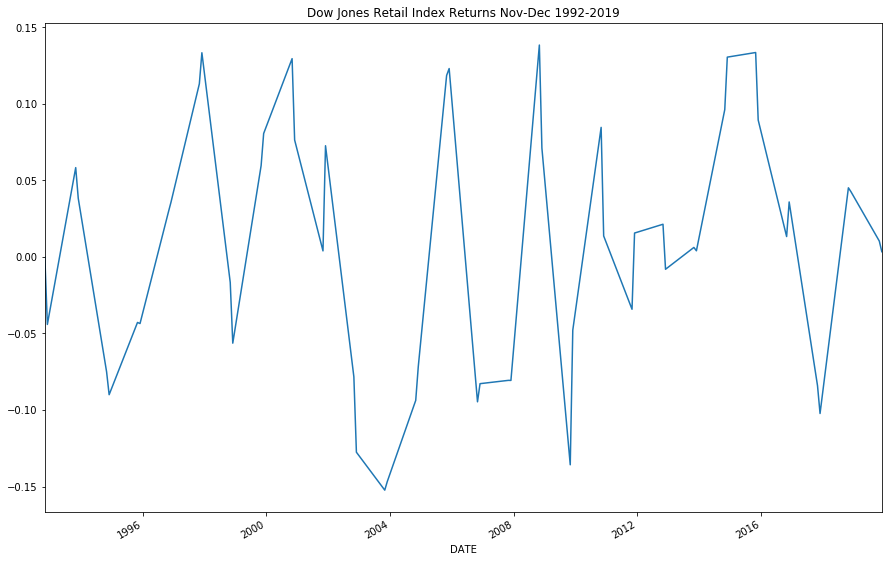

In [53]:
# A plot of returns on of the retail index between November/December from 1992-2019.
retail_returns.plot(figsize=(15,10),title="Dow Jones Retail Index Returns Nov-Dec 1992-2019")

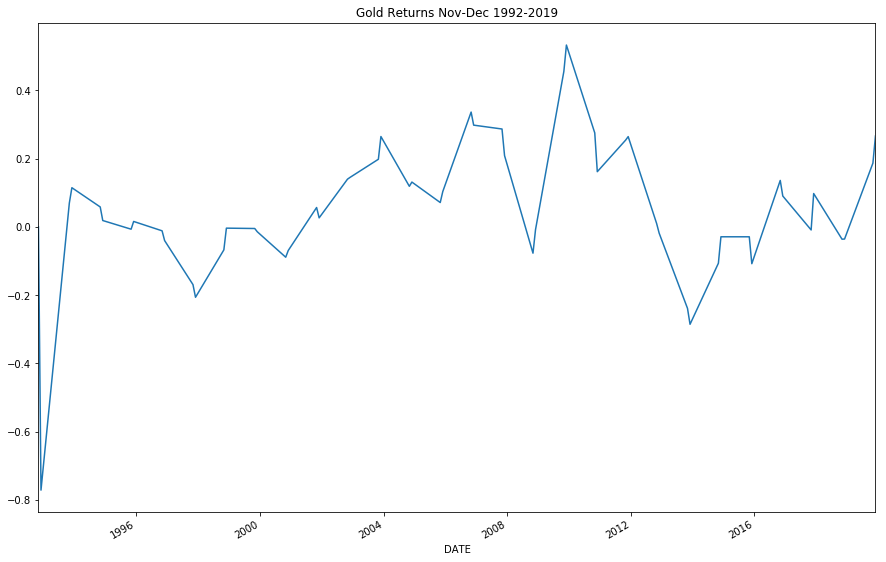

In [52]:
# A plot of returns on of the gold index between November/December from 1992-2019.
gold_returns.plot(figsize=(15,10),title="Gold Returns Nov-Dec 1992-2019")

**Below I will be running a correlation test to analyze the relationship between the Nov-Dec Dow Retail Index Returns and Nov-Dec Gold Returns. My goal is to see them move as opposite as possible, the ideal would be a score of -1. I will also run one on the Nov-Dec Dow Retail Index and February and March of the preceding year Gold Returns testing the affect of Holiday Sales on Q4 GDP and Q4 GDP on the preceding years initial Q1 Gold offerings.**

In [39]:
retail_returns.corr(gold_returns)

-0.3927238215010166

**Above one can see that there is a negative correlation as predicted. We have a score of -0.39. This is solely looking at November/December. I believe that it will be even more negative if we compare Nov/Dec retail to Gold February/March which is when the Q4 report is released.**

In [40]:
gold_returns_df=gold_returns.to_frame()

In [41]:
retail_returns_df=retail_returns.to_frame()

In [42]:
returns_df=gold_returns_df.merge(retail_returns_df, how='outer', left_index=True, right_index=True)

**Here we see a plot of the gold returns and retail returns one can see that while gold has steeper movements, they are moving in opposite directions for the most part.**

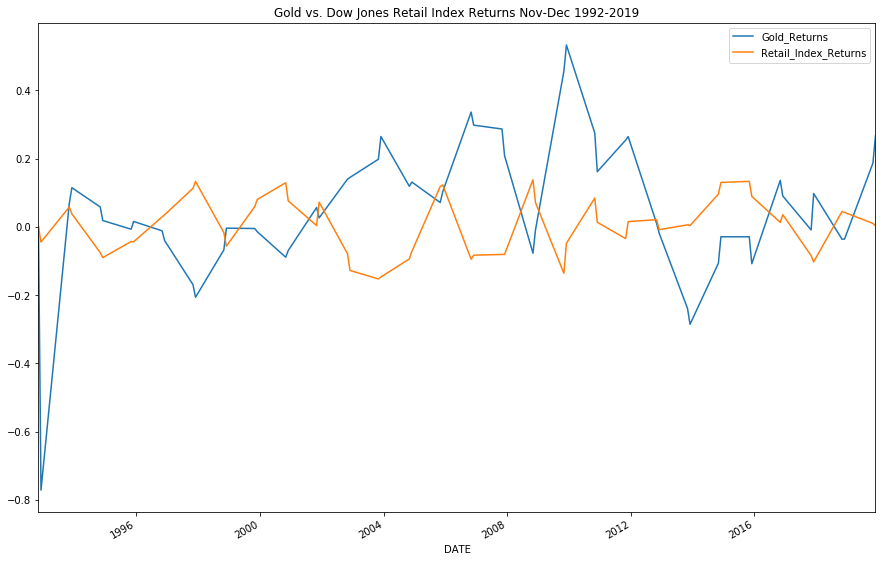

In [51]:
returns_df.plot(figsize=(15,10),title="Gold vs. Dow Jones Retail Index Returns Nov-Dec 1992-2019")

In [57]:
returns_df.corr()

,Gold_Returns,Retail_Index_Returns
Gold_Returns,1.000000,-0.392724
Retail_Index_Returns,-0.392724,1.000000


In [66]:
#gold vs retail DF February/March 1993-2019.
feb_gold_df=Path("~/git/HolidaySales/DataSets/gold_retail_febmar.csv")
f_m_gold_retail_df=pd.read_csv(feb_gold_df,parse_dates=True,infer_datetime_format=True,index_col="DATE")

In [68]:
f_m_gold_retail_df=f_m_gold_retail_df.pct_change().dropna()

In [70]:
f_m_gold_retail_df=f_m_gold_retail_df.rename(columns={"close":"Gold_Returns","monthly_retail":"Retail_Index_Returns"})

In [71]:
f_m_gold_retail_df.head()

,Gold_Returns,Retail_Index_Returns
DATE,,
1993-03-01,-0.003791,-0.009689
1994-02-01,0.161796,0.096264
1994-03-01,-0.000917,0.018373
1995-02-01,-0.013244,0.038908
1995-03-01,-0.001462,0.008496


**Here I will show the relationship between both gold and the retail index returns during Feb/March of 1993-2019 looking at how the release of the previous years Q4 GDP which includes the Nov/Dec sales affects anything. I would believe that regardless of anything we should see a negative correation but it should be even stronger, but I believe the strongest is soon to come.**

In [72]:
f_m_gold_retail_df.corr()

,Gold_Returns,Retail_Index_Returns
Gold_Returns,1.000000,0.291552
Retail_Index_Returns,0.291552,1.000000


**I suspected that they would move in a stronger negative correlation but it actually has became more positive.**

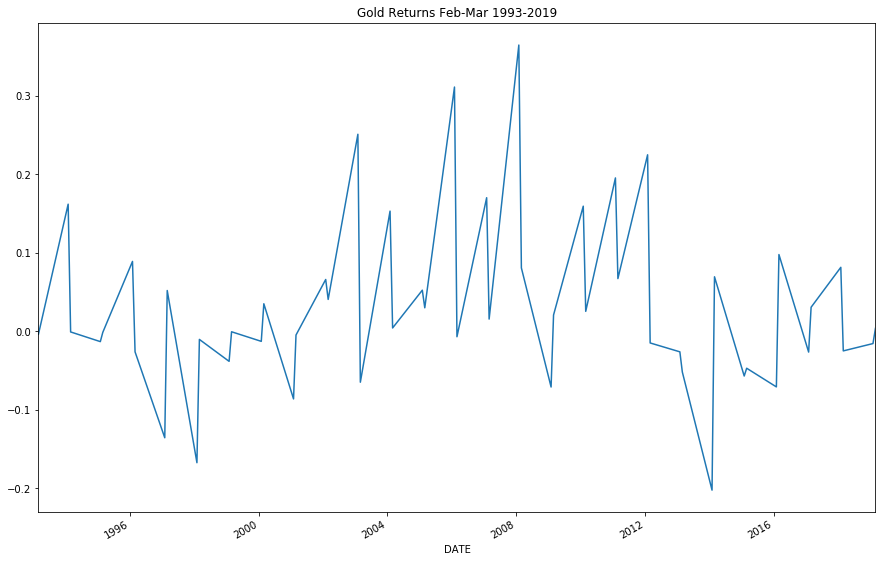

In [74]:
f_m_gold_retail_df["Gold_Returns"].plot(figsize=(15,10),title="Gold Returns Feb-Mar 1993-2019")

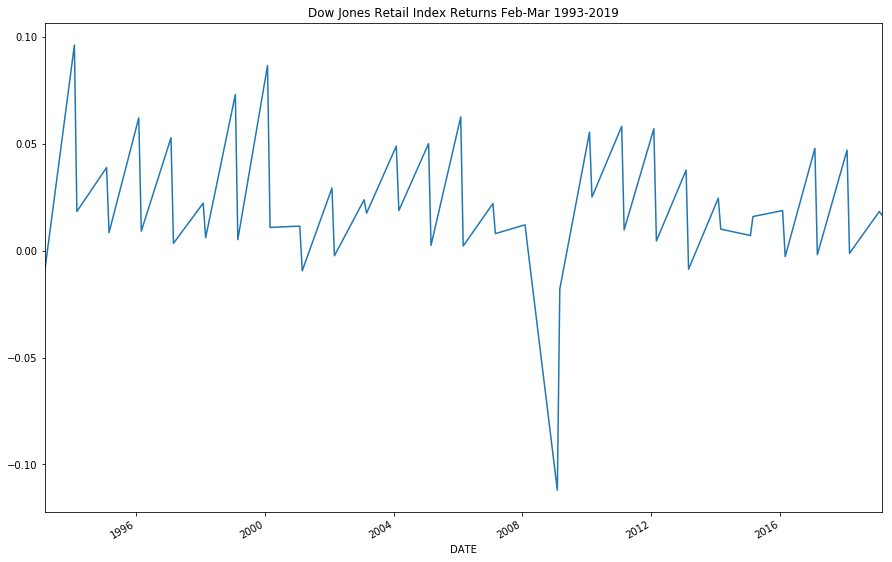

In [75]:
f_m_gold_retail_df["Retail_Index_Returns"].plot(figsize=(15,10),title="Dow Jones Retail Index Returns Feb-Mar 1993-2019")

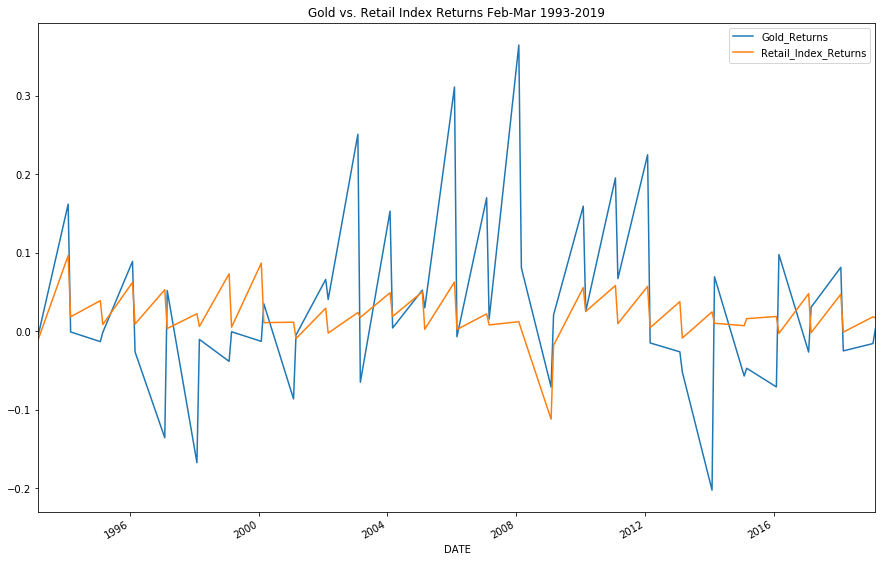

In [77]:
f_m_gold_retail_df.plot(figsize=(15,10),title="Gold vs. Retail Index Returns Feb-Mar 1993-2019")

**From this last graph we can see that there is much more volatility during this period for gold which makes sense with the theory. If you were going to invest from the good holiday sales you would have already done so before they started or sometime in the November to December period, but Feb/Mar would be the time when people would make more interesting decisions on gold after looking at the health of the economy from how spending as a whole and the Q4 GDP came out to be. A perfect example is how big of a spike up gold receive in 2008 when we were in economic turmoil.I believe the best analysis will be next when we look at the Nov/Dec Retail Index vs. the Feb/Mar Gold.**

In [97]:
f_m_gold_returns=f_m_gold_retail_df["Gold_Returns"].reset_index()

In [100]:
f_m_gold_returns=f_m_gold_returns.drop(columns=["DATE"])

In [101]:
retail_returns_data=retail_returns.reset_index()

In [105]:
retail_returns_data=retail_returns_data.drop(columns=["DATE"])

In [111]:
retail_returns_data.head()

,Retail_Index_Returns
0,0.000000
1,0.058275
2,-0.075080
3,-0.042830
4,0.029401


In [119]:
magic_df=pd.DataFrame({"Retail":retail_returns_data["Retail_Index_Returns"],"Gold":f_m_gold_returns["Gold_Returns"]})

In [121]:
magic_df.corr()

,Retail,Gold
Retail,1.000000,0.070483
Gold,0.070483,1.000000


**Suprisingly we see here that my theory might be pretty farfetched. It seems as though while its not a big positive correlation we ended up having the relationship be over zero, so it is not negative. It is .07 so one might just give it a zero and say there's no correlation but still it is not super negative like I expected. From this data it looks like that maybe we just see gold and retail go in opposite directions right in the moment. Right in the holiday season. I guess that would make sense, at that time you expect people to be spending so you will put more investment in consumer related things as opposed to gold and I guess one would say that this energy is pretty much right there in that moment in time.**

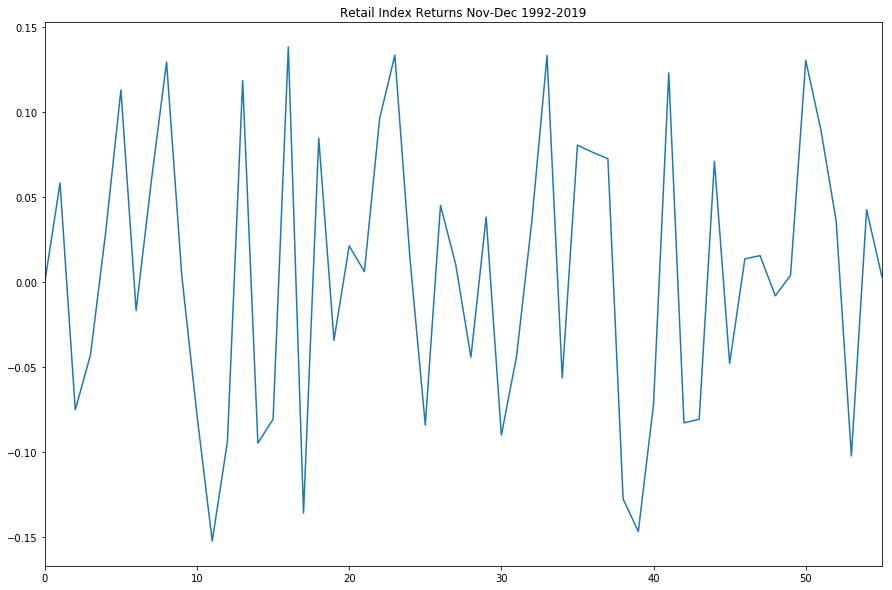

In [127]:
magic_df["Retail"].plot(figsize=(15,10),title="Retail Index Returns Nov-Dec 1992-2019")

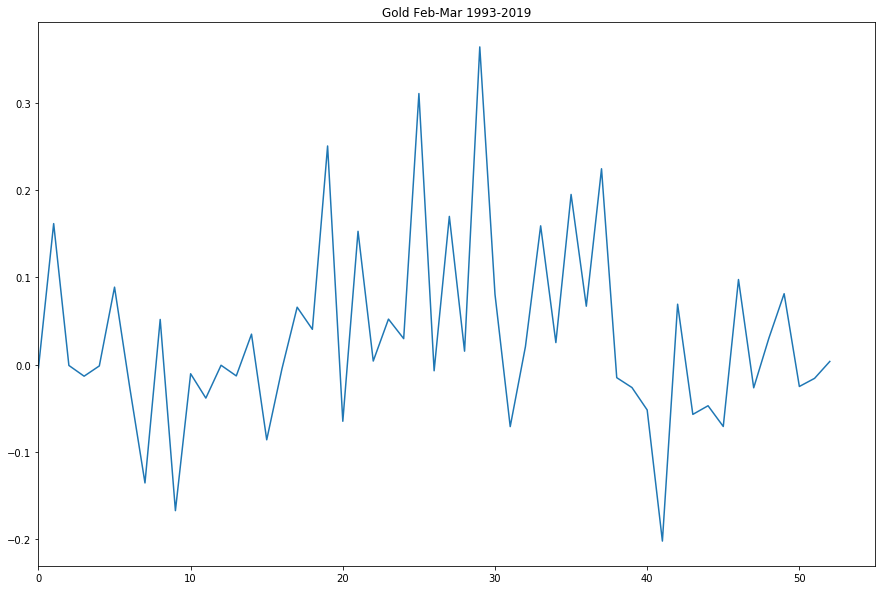

In [126]:
magic_df["Gold"].plot(figsize=(15,10),title="Gold Feb-Mar 1993-2019")

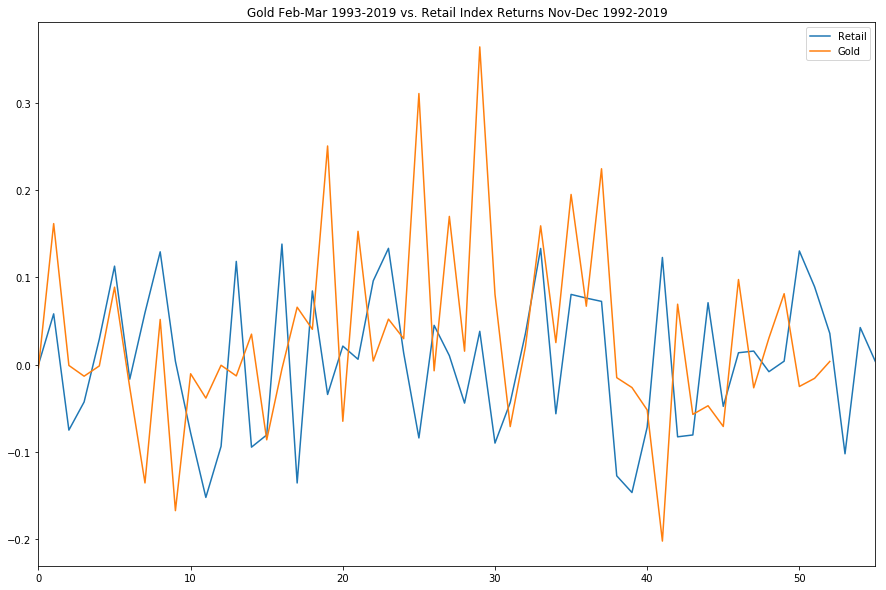

In [125]:
magic_df.plot(figsize=(15,10),title="Gold Feb-Mar 1993-2019 vs. Retail Index Returns Nov-Dec 1992-2019")

### **I will now create two LSTM models with the full features dataframe, one to make unsupervised predictions for holiday sales and another to make predictions of Gold prices.**

In [45]:
main_df.head()

,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,Retail_Index_Returns,Consumer_debt_service,GDP_growth,sales,GDP,Gold_Returns
DATE,,,,,,,,,,,
1992-11-01,0.812100,1.11120,85.3,7.4,-3.664766,0.000000,4.660212,4.4,-18182.99304,-576.109447,0.000000
1993-11-01,0.762175,1.06640,81.2,6.6,-4.077295,0.058275,4.755414,2.6,-15860.78098,-676.804025,0.069956
1994-11-01,0.667100,1.11575,91.6,5.6,-4.587534,-0.075080,5.120072,4.1,-12429.20455,-618.354534,0.058500
1995-11-01,0.485533,1.06225,88.2,5.6,-4.990644,-0.042830,5.594352,2.2,-14721.98639,-742.978904,-0.006632
1996-11-01,0.722600,1.23225,99.2,5.4,-4.278919,0.029401,5.777011,4.4,-14186.08089,-621.669592,-0.011389


In [128]:
# Create my features and target.
y=main_df["sales"].values
X=main_df.drop(columns=["sales"]).values

In [129]:
y[:2]

array([-18182.99304, -15860.78098])

In [130]:
y=y.reshape(-1,1)

In [131]:
X=X.reshape(-1,10)

In [132]:
X.shape

(56, 10)

In [133]:
X[:2]

array([[ 8.12100000e-01,  1.11120000e+00,  8.53000000e+01,
         7.40000000e+00, -3.66476565e+00,  0.00000000e+00,
         4.66021200e+00,  4.40000000e+00, -5.76109447e+02,
         0.00000000e+00],
       [ 7.62175000e-01,  1.06640000e+00,  8.12000000e+01,
         6.60000000e+00, -4.07729527e+00,  5.82748025e-02,
         4.75541400e+00,  2.60000000e+00, -6.76804025e+02,
         6.99558174e-02]])

In [134]:
y.shape

(56, 1)

In [135]:
y[:2]

array([[-18182.99304],
       [-15860.78098]])

In [54]:
X.shape

(56, 10)

In [55]:
# Split the data so I can use 70% of the data for training and the remainder for testing.
split = int(0.7 * len(X))

In [56]:
X_train = X[: split]

In [57]:
X_test = X[split:]

In [58]:
y_train = y[: split]

In [59]:
y_test = y[split:]

In [60]:
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()

In [61]:
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [62]:
X_train = scaler.transform(X_train)

In [63]:
X_test = scaler.transform(X_test)

In [64]:
scaler.fit(y)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [65]:
y_train = scaler.transform(y_train)

In [66]:
y_test = scaler.transform(y_test)

In [67]:
y_test.shape

(17, 1)

In [68]:
y_train.shape

(39, 1)

In [69]:
X_test.shape

(17, 10)

In [70]:
X_train.shape

(39, 10)

In [71]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [72]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [73]:
# Create the instance of my Sequential model.
model = Sequential()

In [74]:
number_units = 1000
dropout_fraction = 0.2

In [75]:
# This is Layer 1.
model.add(LSTM(units=number_units,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(dropout_fraction))

In [76]:
# This is Layer 2.
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

In [77]:
# This is Layer 3.
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

In [78]:
# Here I create my output layer.
model.add(Dense(1))

In [79]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 1000)          4008000   
_________________________________________________________________
dropout (Dropout)            (None, 10, 1000)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 1000)          8004000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 1000)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [81]:
model.fit(X_train,y_train,epochs=100,shuffle=False,batch_size=5,verbose=1)

Epoch 1/100
8/8 [==============================] - 5s 608ms/step - loss: 0.0912
Epoch 2/100
8/8 [==============================] - 5s 628ms/step - loss: 0.0565
Epoch 3/100
8/8 [==============================] - 5s 616ms/step - loss: 0.0944
Epoch 4/100
8/8 [==============================] - 5s 638ms/step - loss: 0.0817
Epoch 5/100
8/8 [==============================] - 5s 613ms/step - loss: 0.0416
Epoch 6/100
8/8 [==============================] - 6s 706ms/step - loss: 0.0623
Epoch 7/100
8/8 [==============================] - 5s 611ms/step - loss: 0.0494
Epoch 8/100
8/8 [==============================] - 5s 608ms/step - loss: 0.0334
Epoch 9/100
8/8 [==============================] - 5s 614ms/step - loss: 0.0428
Epoch 10/100
8/8 [==============================] - 5s 613ms/step - loss: 0.0411
Epoch 11/100
8/8 [==============================] - 5s 660ms/step - loss: 0.0256
Epoch 12/100
8/8 [==============================] - 5s 630ms/step - loss: 0.0282
Epoch 13/100
8/8 [===================

In [82]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 2ms/step - loss: 8.9254e-04


0.0008925377042032778

In [83]:
predictions=model.predict(X_test)

In [84]:
predictions

array([[0.40041965],
       [0.48133102],
       [0.5178716 ],
       [0.524957  ],
       [0.55153793],
       [0.42148024],
       [0.48199445],
       [0.4801046 ],
       [0.4835742 ],
       [0.48415816],
       [0.48995832],
       [0.494447  ],
       [0.49694866],
       [0.51502085],
       [0.508114  ],
       [0.5438399 ],
       [0.5460266 ]], dtype=float32)

In [85]:
# Recover the original prices instead of the scaled version
predicted_sales = scaler.inverse_transform(predictions)
real_sales = scaler.inverse_transform(y_test.reshape(-1, 1))

In [86]:
# Here I create a DataFrame of Real and Predicted values.
sales_df = pd.DataFrame({"Real": real_sales.ravel(),"Predicted": predicted_sales.ravel()}, index = df.index[-len(real_sales): ]) 
sales_df.head()

,Real,Predicted
DATE,,
2011-12-01,-10306.371500,-23935.535156
2012-11-01,6826.500005,292.519440
2012-12-01,14695.305020,11234.214844
2013-11-01,21482.947170,13355.858398
2013-12-01,23554.145510,21315.236328


## **Model Evaluation**

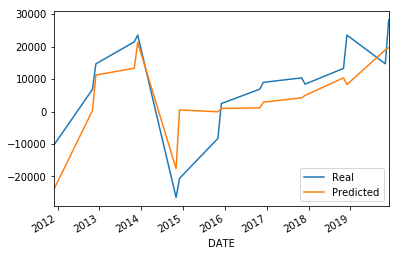

In [87]:
sales_df.plot()

In [88]:
mse = mean_squared_error(sales_df["Real"],sales_df["Predicted"])
rmse = np.sqrt(mse)
std = np.std(sales_df["Real"])
r2=r2_score(sales_df["Real"], sales_df["Predicted"])

In [89]:
mse

80028449.50779356

In [90]:
rmse

8945.86214446621

In [91]:
std

15007.158968142718

In [92]:
r2

0.6446572681010527

## Model 2

In [93]:
# Create the instance of my Sequential model.
model_two = Sequential()

In [94]:
number_units = 1000
dropout_fraction = 0.5

In [95]:
# This is Layer 1.
model_two.add(LSTM(units=number_units,return_sequences=True,input_shape=(X_train.shape[1],1)))
model_two.add(Dropout(dropout_fraction))

In [96]:
# This is Layer 2.
model_two.add(LSTM(units=number_units, return_sequences=True))
model_two.add(Dropout(dropout_fraction))

In [97]:
# This is Layer 3.
model_two.add(LSTM(units=number_units, return_sequences=True))
model_two.add(Dropout(dropout_fraction))

In [98]:
# This is Layer 4.
model_two.add(LSTM(units=number_units))
model_two.add(Dropout(dropout_fraction))

In [99]:
# Here I create my output layer.
model_two.add(Dense(1))

In [100]:
model_two.compile(optimizer="adam",loss="mean_squared_error")

In [101]:
model_two.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 1000)          4008000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 1000)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 1000)          8004000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 1000)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 1000)          8004000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 1000)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1000)             

In [102]:
model_two.fit(X_train,y_train,epochs=100,shuffle=False,batch_size=5,verbose=1)

Epoch 1/100
8/8 [==============================] - 10s 1s/step - loss: 1.0819
Epoch 2/100
8/8 [==============================] - 10s 1s/step - loss: 0.1236
Epoch 3/100
8/8 [==============================] - 8s 1s/step - loss: 0.1040
Epoch 4/100
8/8 [==============================] - 7s 920ms/step - loss: 0.0618
Epoch 5/100
8/8 [==============================] - 7s 920ms/step - loss: 0.0838
Epoch 6/100
8/8 [==============================] - 7s 915ms/step - loss: 0.0581
Epoch 7/100
8/8 [==============================] - 8s 940ms/step - loss: 0.0598
Epoch 8/100
8/8 [==============================] - 8s 942ms/step - loss: 0.0514
Epoch 9/100
8/8 [==============================] - 9s 1s/step - loss: 0.0495
Epoch 10/100
8/8 [==============================] - 9s 1s/step - loss: 0.0383
Epoch 11/100
8/8 [==============================] - 7s 907ms/step - loss: 0.0470
Epoch 12/100
8/8 [==============================] - 7s 866ms/step - loss: 0.0352
Epoch 13/100
8/8 [==============================] 

In [103]:
model_two.evaluate(X_test,y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.0023


0.002301950938999653

In [104]:
predictions_two=model_two.predict(X_test)

In [105]:
predictions_two

array([[0.47574574],
       [0.54280007],
       [0.5170685 ],
       [0.5513818 ],
       [0.57710516],
       [0.54274976],
       [0.48859283],
       [0.4723747 ],
       [0.4896249 ],
       [0.534256  ],
       [0.5494547 ],
       [0.48265162],
       [0.52883154],
       [0.5404824 ],
       [0.5723983 ],
       [0.57806695],
       [0.5557834 ]], dtype=float32)

In [6]:
# Recover the original prices instead of the scaled version
predicted_sales_two = scaler.inverse_transform(predictions_two)
real_sales_two = scaler.inverse_transform(y_test.reshape(-1, 1))

NameError: name 'scaler' is not defined

In [5]:
# Here I create a DataFrame of Real and Predicted values.
sales_two_df = pd.DataFrame({"Real": real_sales_two.ravel(),"Predicted": predicted_sales_two.ravel()}, index = df.index[-len(real_sales): ]) 
sales_two_df.head()

NameError: name 'real_sales_two' is not defined

## **Model Evaluation**

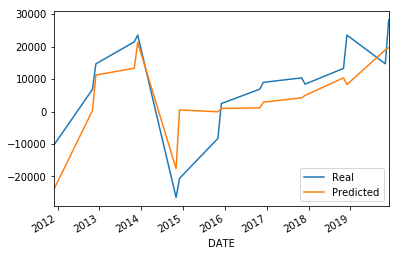

In [108]:
sales_df.plot()

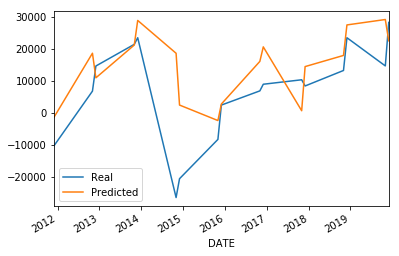

In [109]:
sales_two_df.plot()

## **Trade Alogrithm**

In [4]:
r2_two=r2_score(sales_two_df["Real"], sales_two_df["Predicted"])

NameError: name 'sales_two_df' is not defined